In [6]:
pip install keras

     |████████████████████████████████| 378kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 9.4MB/s  eta 0:00:01
     |████████████████████████████████| 51kB 7.7MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow

     |████████████████████████████████| 120.8MB 699kB/s eta 0:00:01   |▉                               | 3.2MB 1.4MB/s eta 0:01:25     |██████▌                         | 24.7MB 12.9MB/s eta 0:00:08     |████████████████████▉           | 78.5MB 15.7MB/s eta 0:00:03     |█████████████████████████▍      | 95.9MB 17.0MB/s eta 0:00:02     |████████████████████████████▎   | 106.6MB 250kB/s eta 0:00:57     |█████████████████████████████   | 109.4MB 9.7MB/s eta 0:00:02
     |████████████████████████████████| 450kB 12.8MB/s eta 0:00:01
     |████████████████████████████████| 2.6MB 17.8MB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 288kB/s eta 0:00:01
     |████████████████████████████████| 71kB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 10.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 14.3MB/s eta 0:00:01
  

  Stored in directory: /Users/ranjaniramanathan/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /Users/ranjaniramanathan/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: /Users/ranjaniramanathan/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built termcolor gast absl-py
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [139]:

import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("train/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}
#labels the folders in the directory
image_data = []
labels = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"): #For each image in the list of images: 
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img) #Converts image into numerical values
        image_data.append(img_array) #Append the numerical representation of the image to an array
        labels.append(labels_dict[label])#The label list appends the label of that particular instance

In [140]:
print(len(labels))
print(len(image_data))

5198
5198


In [141]:

#convert data to numpy array 
image_data = np.array(image_data, dtype='float32')/255.0 #Why do we need this? 
labels = np.array(labels)
#192*192 is the size
print(image_data.shape, labels.shape) #This means it is a four dimensional?
#prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 


#Experiement: Looks like the standard deviation does not need to change because the numbers are pretty close in value. 
#Calculating the mean for channel three for an image. 


(5198, 192, 192, 3) (5198,)


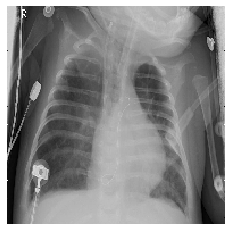

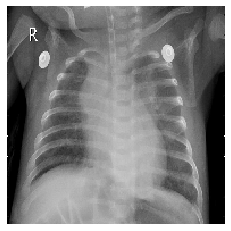

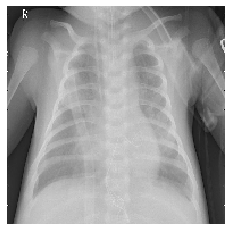

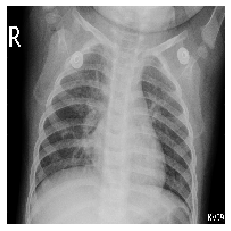

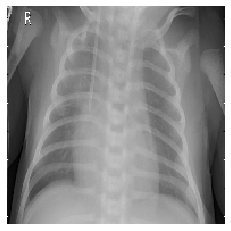

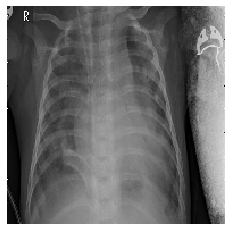

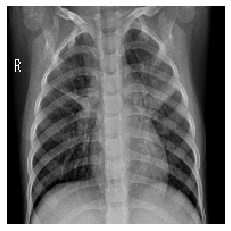

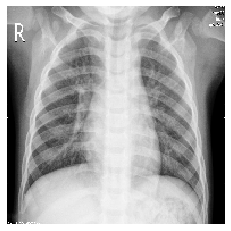

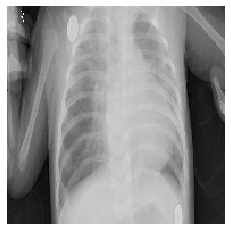

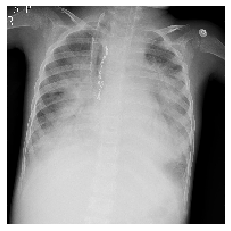

In [142]:
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

In [143]:
#print(image_data[0][0][1]) #These are the three colors in the first example, second row, second column
#print(image_data[0])#This is the first example with each array group representing a row with 
#192 groups. So All I need to make a line of features is 
#
#4) Take the mean and standard, normalize the copied list. - Don't forget to clip!
#5) Print the normalized list - image_data
#6) Optional: Display. But I am too fucking lazy. 

images_copy = []
for that_image in image_data: #taking data for each image
    image_data_copy = [] #The pixel data for that image
    for row in that_image: 
        for column in row: #Each pixel
            image_data_copy.append(column) #Column is a triplet of identical RGB - should be 36864
    image_data_copy = np.array(image_data_copy, dtype='float32')
    image_data_copy = image_data_copy[:, 0]
    images_copy.append(image_data_copy)
for i in range(5):
    print(image_data_copy[i])
    print(single_pixel_data[i])
print(len(single_pixel_data))
print(len(images_copy))
images_copy = np.array(images_copy, dtype='float32')

0.6666667
0.5529412
0.4392157
0.5647059
0.27450982
0.5882353
0.22352941
0.54901963
0.19607843
0.56078434
36864
5198


In [99]:
#This is the part where I normalize the image. For the line of data in the image, compute the mean
#and standard deviation, then normalize the line and clip the line for each image. So each image
#set of colors should be a range from 0 to 1 with the same grayscale range. 
from numpy import clip
j = 0
for k in range(50,55):
    print(images_copy[k].mean())
for pix in range (len(images_copy)):
    pixelline = images_copy[pix]
    mean, std = pixelline.mean(), pixelline.std()
   
    pixelline = (pixelline - mean)/std
   
    
    pixelline = clip(pixelline, -1.0, 1.0)
    pixelline = (pixelline + 1.0)/2.0
    
    #Convert each value of the triplet to the normalized value in the pixelline - this is an
    #experiment
    images_copy[pix] = pixelline
    
    j = j+1
for l in range(50,55):
    print(images_copy[l].mean())

[0.56078434 0.56078434 0.56078434]
[0.5647059 0.5647059 0.5647059]
[0.5686275 0.5686275 0.5686275]
[0.5176471 0.5176471 0.5176471]
[0.4117647 0.4117647 0.4117647]
Mean and standard deviation
0.47037613
0.18897419
-3.973643e-08
1.0
0.5111991
0.39315474
Mean and standard deviation
0.44064978
0.20235611
1.05963814e-07
1.0
0.5313971
0.36173308
Mean and standard deviation
0.58204013
0.19509834
3.5762787e-07
0.99999994
0.56977123
0.36364603
Mean and standard deviation
0.47673905
0.2394384
-2.1192763e-07
1.0
0.55492115
0.37044528
Mean and standard deviation
0.503525
0.16645113
-1.1258655e-07
1.0
0.55066067
0.36294803
Mean and standard deviation
0.3748698
0.17628136
5.2154064e-08
0.99999994
0.48996195
0.36684677
Mean and standard deviation
0.36031815
0.21004282
5.9604645e-08
1.0
0.525352
0.37767395
Mean and standard deviation
0.61739194
0.25269493
1.1920929e-07
1.0
0.5502293
0.36235353
Mean and standard deviation
0.5281345
0.22919758
-2.1027193e-07
1.0
0.5577752
0.38347602
Mean and standard de

Mean and standard deviation
0.47079748
0.22844544
7.616149e-08
0.99999994
0.55657125
0.36786953
Mean and standard deviation
0.5251312
0.1989891
-2.1192763e-07
1.0
0.5409495
0.38150164
Mean and standard deviation
0.41460812
0.24189329
3.3113693e-08
1.0
0.52190274
0.37816477
Mean and standard deviation
0.42660296
0.20476553
-1.1258655e-07
1.0
0.53973347
0.36686066
Mean and standard deviation
0.45292813
0.19891953
-1.1589792e-07
1.0
0.52008563
0.39373007
Mean and standard deviation
0.27347952
0.12109927
3.3113693e-08
1.0
0.4920292
0.36692855
Mean and standard deviation
0.53789544
0.21856909
-6.953875e-08
1.0
0.5680775
0.36735323
Mean and standard deviation
0.5125132
0.1698397
-9.271834e-08
1.0
0.5474479
0.37154773
Mean and standard deviation
0.5265696
0.2333198
1.5232298e-07
0.99999994
0.57282233
0.3566216
Mean and standard deviation
0.5568059
0.19492039
2.3179584e-07
1.0
0.5684297
0.35184973
Mean and standard deviation
0.4836607
0.20587455
-1.05963814e-07
0.99999994
0.5492843
0.3718199
M

Mean and standard deviation
0.5130815
0.22410637
-4.3047798e-08
1.0
0.5573272
0.37453806
Mean and standard deviation
0.35213602
0.21452919
-7.8645016e-08
1.0
0.5138052
0.37790588
Mean and standard deviation
0.29741308
0.15321587
-3.973643e-08
0.9999999
0.48144245
0.37722448
Mean and standard deviation
0.5477359
0.15520099
9.934107e-08
1.0
0.5406816
0.3769144
Mean and standard deviation
0.40971023
0.2838686
-5.6293274e-08
1.0
0.52554
0.39746657
Mean and standard deviation
0.43093246
0.208258
3.0630165e-08
1.0
0.5354166
0.3704494
Mean and standard deviation
0.5642626
0.23913312
-6.6227386e-08
1.0
0.5650091
0.35129791
Mean and standard deviation
0.4795388
0.23883666
-1.3245477e-08
1.0
0.54169613
0.36747462
Mean and standard deviation
0.4428179
0.30152622
6.953875e-08
1.0
0.53833944
0.40368527
Mean and standard deviation
0.4332657
0.19034016
1.3245477e-08
1.0
0.5220388
0.3880012
Mean and standard deviation
0.32186398
0.17313366
-1.9868214e-07
0.99999994
0.4434057
0.35110235
Mean and standa

Mean and standard deviation
0.40963918
0.2207455
-1.390775e-07
1.0
0.506779
0.4048101
Mean and standard deviation
0.47232765
0.12604347
7.616149e-08
0.9999999
0.5551577
0.3684302
Mean and standard deviation
0.50685906
0.23115405
-1.291434e-07
1.0
0.5579154
0.38098186
Mean and standard deviation
0.5510528
0.19429654
-3.344483e-07
1.0
0.5601585
0.36274853
Mean and standard deviation
0.38366058
0.17444149
-8.6095596e-08
1.0
0.46827826
0.3880835
Mean and standard deviation
0.5031695
0.23370473
9.934108e-09
1.0
0.5586733
0.37432128
Mean and standard deviation
0.60735154
0.2576887
1.1258655e-07
1.0
0.5608819
0.36407295
Mean and standard deviation
0.40231356
0.21785073
-5.380975e-08
1.0
0.5290617
0.38350093
Mean and standard deviation
0.4210509
0.22841004
-6.953875e-08
1.0
0.54865
0.3778446
Mean and standard deviation
0.36649966
0.16772747
-1.3245477e-08
0.99999994
0.51967657
0.37364247
Mean and standard deviation
0.32891926
0.17348899
-1.4570024e-07
1.0
0.4501635
0.36615157
Mean and standard

Mean and standard deviation
0.5817942
0.22836515
2.2268958e-07
0.99999994
0.57637966
0.32989866
Mean and standard deviation
0.4410068
0.19974498
-6.6227384e-09
0.99999994
0.5217696
0.3940283
Mean and standard deviation
0.5142223
0.2472272
-1.1258655e-07
1.0
0.5634347
0.3566523
Mean and standard deviation
0.35816634
0.19532378
-3.973643e-08
1.0
0.5030421
0.3918654
Mean and standard deviation
0.38811508
0.17271096
1.1920929e-07
0.99999994
0.49829122
0.39232868
Mean and standard deviation
0.48841932
0.2395961
8.112855e-08
1.0
0.5641997
0.3681571
Mean and standard deviation
0.63767046
0.2357591
-1.0016892e-07
1.0
0.58078
0.32126036
Mean and standard deviation
0.4765724
0.21467093
5.6293274e-08
1.0
0.5396127
0.3735818
Mean and standard deviation
0.370144
0.18759671
-1.9868216e-08
0.99999994
0.49583018
0.37995481
Mean and standard deviation
0.40674523
0.26626867
-7.285012e-08
1.0
0.5163066
0.39455798
Mean and standard deviation
0.56435454
0.28553066
-5.9604645e-08
1.0
0.5756206
0.3621313
Mea

Mean and standard deviation
0.4571655
0.23142816
2.6490953e-08
1.0
0.5647854
0.37254214
Mean and standard deviation
0.49851048
0.21974532
5.2981907e-08
1.0
0.55635035
0.38896716
Mean and standard deviation
0.4133952
0.19755356
-9.934108e-09
1.0
0.51577044
0.3841893
Mean and standard deviation
0.41680798
0.20141679
-1.4073319e-07
1.0
0.53876764
0.38900682
Mean and standard deviation
0.50562596
0.28410372
8.940697e-08
1.0000001
0.5625351
0.37410215
Mean and standard deviation
0.43980482
0.17913005
4.635917e-08
1.0
0.52068305
0.38590628
Mean and standard deviation
0.44882318
0.2199858
-2.15239e-07
1.0
0.5375058
0.39290902
Mean and standard deviation
0.50615555
0.21664716
6.6227384e-09
1.0
0.567827
0.3469844
Mean and standard deviation
0.4587582
0.2598846
6.953875e-08
0.99999994
0.52938735
0.37571245
Mean and standard deviation
0.6162798
0.23492952
-3.3113692e-09
1.0
0.5763701
0.33242896
Mean and standard deviation
0.4238653
0.20483536
-1.2583203e-07
1.0
0.5284987
0.37525654
Mean and stand

Mean and standard deviation
0.31900403
0.21672149
5.2981907e-08
1.0
0.48491684
0.3914986
Mean and standard deviation
0.5750639
0.25143248
-1.7550256e-07
1.0
0.55862147
0.3623958
Mean and standard deviation
0.2987839
0.16474792
-1.1920929e-07
0.99999994
0.4470309
0.3664727
Mean and standard deviation
0.43044278
0.12537073
2.0530489e-07
1.0
0.53327745
0.3700774
Mean and standard deviation
0.48826995
0.17669551
1.7881393e-07
1.0
0.52566606
0.39132023
Mean and standard deviation
0.49410602
0.2154842
1.7964177e-07
1.0
0.55362195
0.37102276
Mean and standard deviation
0.39247507
0.21588911
-6.6227386e-08
1.0
0.5189049
0.4012574
Mean and standard deviation
0.35074297
0.16090812
-2.6490953e-08
1.0000001
0.5240847
0.37225688
Mean and standard deviation
0.49791253
0.20166223
2.3179584e-08
0.99999994
0.54036623
0.38208908
Mean and standard deviation
0.6207464
0.20154868
-2.2889839e-07
1.0
0.58208734
0.3238108
Mean and standard deviation
0.54822797
0.13117306
-1.5066729e-07
1.0
0.53829694
0.389143

Mean and standard deviation
0.47321987
0.2370888
-4.1392113e-08
1.0
0.54415816
0.38012722
Mean and standard deviation
0.50357205
0.26430762
-1.05963814e-07
1.0
0.56008583
0.36936998
Mean and standard deviation
0.57399875
0.19549856
1.09275184e-07
0.99999994
0.5638914
0.3759423
Mean and standard deviation
0.4833275
0.25973895
-5.2981907e-08
1.0
0.5533442
0.37806997
Mean and standard deviation
0.5684816
0.21314093
-2.9802322e-08
0.99999994
0.5639408
0.36413506
Mean and standard deviation
0.5115079
0.3361545
-5.6293274e-08
1.0000001
0.5617666
0.39628792
Mean and standard deviation
0.501864
0.23260984
-9.271834e-08
1.0
0.53814536
0.36813554
Mean and standard deviation
0.55866444
0.24938506
-1.7384689e-07
1.0
0.5603497
0.38484314
Mean and standard deviation
0.3937113
0.2022126
-4.635917e-08
1.0
0.5210937
0.37935534
Mean and standard deviation
0.6213158
0.14345142
6.6227384e-09
0.99999994
0.5608027
0.350515
Mean and standard deviation
0.4083259
0.19183065
-6.6227386e-08
1.0
0.48678854
0.3827

Mean and standard deviation
0.45752966
0.20108867
-6.2916016e-08
0.99999994
0.5269822
0.39331645
Mean and standard deviation
0.6141605
0.22461763
4.9670536e-08
1.0
0.5838188
0.30914497
Mean and standard deviation
0.54361176
0.20031065
-2.1937821e-07
1.0
0.55983
0.3657668
Mean and standard deviation
0.4631354
0.22649652
1.05963814e-07
1.0
0.525671
0.40519762
Mean and standard deviation
0.5474619
0.24946015
-6.953875e-08
1.0
0.58322865
0.34871683
Mean and standard deviation
0.5965555
0.19181266
4.520019e-07
1.0
0.58004755
0.32593164
Mean and standard deviation
0.39463836
0.21227975
1.2252066e-07
1.0
0.52716446
0.37474158
Mean and standard deviation
0.36490962
0.27157453
-3.642506e-08
0.99999994
0.5199725
0.41306588
Mean and standard deviation
0.47472557
0.18384127
-1.05963814e-07
1.0
0.5190999
0.38063854
Mean and standard deviation
0.43996683
0.25294974
6.953875e-08
1.0
0.5274057
0.38463503
Mean and standard deviation
0.56409305
0.16622205
-4.635917e-08
1.0
0.55945045
0.36446258
Mean and

Mean and standard deviation
0.39188573
0.26226053
-6.0432484e-08
1.0
0.51709265
0.41595152
Mean and standard deviation
0.5012006
0.22715428
-3.973643e-08
1.0
0.55232525
0.38893697
Mean and standard deviation
0.43742266
0.2959572
2.9802322e-08
1.0
0.5303769
0.39493686
Mean and standard deviation
0.65795714
0.2358661
2.1441116e-07
1.0
0.58253205
0.30901882
Mean and standard deviation
0.4424535
0.23252833
-1.8874805e-07
0.99999994
0.5525716
0.3631511
Mean and standard deviation
0.3378079
0.17893882
-1.3245477e-07
1.0
0.48455635
0.3789485
Mean and standard deviation
0.44869933
0.21743454
-6.2916016e-08
1.0
0.53738886
0.39280462
Mean and standard deviation
0.48103333
0.24729726
-2.6490953e-08
1.0
0.5648327
0.3684395
Mean and standard deviation
0.40815568
0.2565122
3.642506e-08
1.0
0.54549354
0.38061836
Mean and standard deviation
0.47339827
0.20975229
-4.635917e-08
1.0
0.51073915
0.36971843
Mean and standard deviation
0.3246097
0.1555951
4.3047798e-08
1.0
0.4967417
0.37481084
Mean and stand

Mean and standard deviation
0.5498536
0.16884737
7.947286e-08
1.0
0.56173086
0.35855055
Mean and standard deviation
0.5959828
0.27106607
5.2981907e-08
1.0
0.5718206
0.35522914
Mean and standard deviation
0.54810596
0.2514726
-1.1258655e-07
1.0
0.56564397
0.3643451
Mean and standard deviation
0.50015503
0.3018524
-8.6095596e-08
1.0
0.5629749
0.38416567
Mean and standard deviation
0.46234226
0.20376845
-6.6227386e-08
1.0
0.51794934
0.39562362
Mean and standard deviation
0.45548522
0.18652967
1.4570024e-07
1.0
0.5225166
0.39588436
Mean and standard deviation
0.47398886
0.23238301
6.6227386e-08
1.0
0.52360225
0.37244725
Mean and standard deviation
0.45573288
0.20111147
9.768539e-08
1.0
0.52821374
0.38260144
Mean and standard deviation
0.31930256
0.17793895
-8.775128e-08
1.0
0.49100697
0.38575107
Mean and standard deviation
0.5560909
0.20217682
-1.09275184e-07
1.0
0.5455837
0.39222804
Mean and standard deviation
0.5604962
0.22411576
1.7219119e-07
1.0
0.5772077
0.3562927
Mean and standard de

Mean and standard deviation
0.48098004
0.24108057
-8.2784226e-08
1.0
0.5344182
0.37410545
Mean and standard deviation
0.5478429
0.19536835
2.0199352e-07
1.0
0.563264
0.36431834
Mean and standard deviation
0.5011805
0.24993983
-1.05963814e-07
0.99999994
0.5557983
0.38275385
Mean and standard deviation
0.5629793
0.18398172
-1.4901161e-07
1.0
0.5508557
0.35520965
Mean and standard deviation
0.46882242
0.19226724
1.9868214e-07
1.0
0.5321923
0.37900737
Mean and standard deviation
0.51732755
0.2515919
2.4504132e-07
1.0
0.5376179
0.3793466
Mean and standard deviation
0.5681944
0.2714471
8.278423e-09
1.0
0.5747066
0.35745436
Mean and standard deviation
0.64629257
0.20827152
8.6095596e-08
0.99999994
0.5691011
0.34483624
Mean and standard deviation
0.4159703
0.2598897
7.947286e-08
1.0
0.53463596
0.39008206
Mean and standard deviation
0.5201547
0.26955944
1.2583203e-07
1.0
0.5519675
0.3770499
Mean and standard deviation
0.4592521
0.2226715
2.4835268e-07
1.0
0.534538
0.39245945
Mean and standard d

Mean and standard deviation
0.5946219
0.19863419
1.3245477e-08
1.0
0.56267864
0.36042622
Mean and standard deviation
0.64197487
0.24820454
-2.6490953e-08
0.99999994
0.55114406
0.36805224
Mean and standard deviation
0.64710766
0.18211386
5.008446e-08
1.0
0.5889368
0.29473683
Mean and standard deviation
0.4788065
0.28945753
-4.9670536e-08
1.0
0.5577506
0.3821035
Mean and standard deviation
0.48307663
0.22405523
9.934107e-08
1.0
0.56510085
0.3664507
Mean and standard deviation
0.3879033
0.20069076
-2.9802322e-08
1.0
0.5368546
0.38281044
Mean and standard deviation
0.3982873
0.20585889
3.3113693e-08
1.0
0.51399773
0.38608745
Mean and standard deviation
0.4818735
0.19647823
-4.9670536e-08
1.0
0.5405997
0.3884163
Mean and standard deviation
0.5944078
0.16955757
-2.1689468e-07
1.0
0.5641496
0.345428
Mean and standard deviation
0.44081342
0.25685468
-5.2981907e-08
1.0000001
0.52684665
0.4090525
Mean and standard deviation
0.44105244
0.25240773
3.973643e-08
1.0000001
0.5365024
0.3807492
Mean an

Mean and standard deviation
0.4708777
0.21378039
-9.934108e-09
1.0
0.55123794
0.37456277
Mean and standard deviation
0.5380132
0.25223088
-1.2583203e-07
1.0
0.5776872
0.36407623
Mean and standard deviation
0.43671453
0.2782253
-8.982089e-08
1.0
0.5363672
0.39678967
Mean and standard deviation
0.34420913
0.17440844
4.9670536e-08
1.0
0.49058327
0.38547367
Mean and standard deviation
0.5659772
0.19355322
1.05963814e-07
0.99999994
0.550495
0.38253096
Mean and standard deviation
0.3262107
0.16458204
1.3245477e-08
0.99999994
0.47319338
0.36780354
Mean and standard deviation
0.39075217
0.19357038
-1.7881393e-07
1.0
0.47843254
0.3920694
Mean and standard deviation
0.44450903
0.23221512
-6.6227384e-09
1.0
0.52351975
0.3686511
Mean and standard deviation
0.44109258
0.26268548
-1.2252066e-07
1.0
0.5551014
0.38235173
Mean and standard deviation
0.4830532
0.23299153
1.6391277e-07
1.0
0.5486613
0.39470643
Mean and standard deviation
0.43786743
0.19434722
5.9604645e-08
0.99999994
0.50356364
0.3894612

Mean and standard deviation
0.3706343
0.15396492
1.2583203e-07
1.0
0.5173247
0.38017142
Mean and standard deviation
0.34649917
0.17326109
-2.4835268e-08
1.0
0.48062325
0.3759723
Mean and standard deviation
0.32183945
0.21442515
1.2583203e-07
1.0
0.4790784
0.3844835
Mean and standard deviation
0.45050892
0.24235545
3.642506e-08
0.99999994
0.5375312
0.40805402
Mean and standard deviation
0.5956257
0.2746602
-3.973643e-08
1.0
0.57132894
0.3564101
Mean and standard deviation
0.47695196
0.20410126
5.2981907e-08
1.0
0.5316989
0.37609896
Mean and standard deviation
0.49810708
0.2817889
7.285012e-08
0.99999994
0.54551446
0.38892865
Mean and standard deviation
0.35870427
0.22039919
7.947286e-08
1.0000001
0.5105819
0.3962497
Mean and standard deviation
0.47047138
0.22244692
-2.0861626e-07
0.99999994
0.5439607
0.37188262
Mean and standard deviation
0.44459376
0.1463342
-3.245142e-07
0.99999994
0.5239167
0.39280856
Mean and standard deviation
0.6082844
0.24175413
-9.934108e-09
1.0
0.55884445
0.347

Mean and standard deviation
0.5243556
0.18445478
-1.1920929e-07
1.0
0.5457358
0.3762451
Mean and standard deviation
0.5365171
0.21640512
-7.947286e-08
1.0
0.5310277
0.3652637
Mean and standard deviation
0.47667122
0.2076001
6.7883065e-08
1.0
0.527286
0.3694143
Mean and standard deviation
0.5917978
0.17952509
1.05963814e-07
0.99999994
0.57534087
0.33049423
Mean and standard deviation
0.36464456
0.19950144
-2.2186174e-07
1.0
0.5063412
0.39337134
Mean and standard deviation
0.4501449
0.2565067
5.9604645e-08
0.9999999
0.5364339
0.37880746
Mean and standard deviation
0.43223318
0.216653
-6.6227386e-08
1.0
0.52589464
0.3949252
Mean and standard deviation
0.51003337
0.2501678
8.6095596e-08
1.0
0.53468555
0.3751396
Mean and standard deviation
0.44580036
0.23962346
1.3245477e-08
0.99999994
0.5354717
0.3770456
Mean and standard deviation
0.45932278
0.19406956
3.3113692e-09
1.0
0.5414745
0.35109502
Mean and standard deviation
0.45711523
0.17476285
-2.0861626e-07
1.0
0.5382207
0.3791416
Mean and s

Mean and standard deviation
0.62008834
0.27763832
1.1920929e-07
0.99999994
0.5553484
0.38081625
Mean and standard deviation
0.4872073
0.23628904
-1.622571e-07
1.0
0.56512886
0.36203
Mean and standard deviation
0.6090625
0.18216269
-1.0430813e-07
1.0
0.5769058
0.3088045
Mean and standard deviation
0.58109593
0.18307288
2.4172994e-07
1.0
0.5604142
0.35570613
Mean and standard deviation
0.43334922
0.21372934
-1.1258655e-07
1.0
0.5173614
0.3874589
Mean and standard deviation
0.5726355
0.13998239
3.5762787e-07
1.0
0.54034805
0.36890134
Mean and standard deviation
0.35877854
0.20720124
1.6556847e-08
1.0
0.4874344
0.38067695
Mean and standard deviation
0.55416435
0.23116626
-3.3113693e-08
0.99999994
0.5481262
0.35180226
Mean and standard deviation
0.42173237
0.18625724
-4.635917e-08
1.0
0.51419365
0.38557684
Mean and standard deviation
0.31263316
0.1492776
2.4504132e-07
0.99999994
0.48593923
0.3634607
Mean and standard deviation
0.5459639
0.17761661
-4.9670536e-08
1.0
0.53972375
0.3802904
Mea

Mean and standard deviation
0.48185423
0.21058169
9.271834e-08
1.0
0.55018556
0.3742507
Mean and standard deviation
0.6061915
0.25402695
-4.635917e-08
0.99999994
0.56499267
0.35568884
Mean and standard deviation
0.4210926
0.28332615
-3.3113693e-08
0.99999994
0.51541024
0.3945301
Mean and standard deviation
0.4887974
0.21047977
9.934107e-08
1.0
0.5386597
0.39591277
Mean and standard deviation
0.5762106
0.19225089
-3.642506e-08
1.0000001
0.5565469
0.3583944
Mean and standard deviation
0.43588403
0.19269133
-1.1920929e-07
1.0
0.5233649
0.39940417
Mean and standard deviation
0.38291222
0.23340206
-1.3245477e-07
1.0
0.519302
0.39553344
Mean and standard deviation
0.4649626
0.24570306
-6.953875e-08
1.0
0.5417269
0.39472455
Mean and standard deviation
0.3373866
0.16127191
1.3245477e-08
1.0
0.46902433
0.3737532
Mean and standard deviation
0.3352199
0.18314286
-8.940697e-08
1.0
0.5403362
0.37062052
Mean and standard deviation
0.41242012
0.22742893
-1.3245477e-08
1.0
0.5234408
0.37925884
Mean an

Mean and standard deviation
0.6162846
0.24077116
-1.8378098e-07
1.0
0.5894555
0.31156752
Mean and standard deviation
0.40652087
0.23743337
-7.947286e-08
1.0
0.50857073
0.4094748
Mean and standard deviation
0.4884919
0.18701856
9.934108e-09
0.99999994
0.5314104
0.3942009
Mean and standard deviation
0.53130907
0.19715789
-6.2916016e-08
0.99999994
0.549167
0.36485678
Mean and standard deviation
0.41830248
0.18732667
-1.3245477e-08
1.0
0.49843857
0.40100318
Mean and standard deviation
0.52076685
0.22088036
2.6490953e-08
1.0
0.55938673
0.36001724
Mean and standard deviation
0.4858786
0.2484048
-4.635917e-08
1.0
0.5489621
0.37247774
Mean and standard deviation
0.613112
0.23274623
1.779861e-07
1.0
0.57391894
0.3376917
Mean and standard deviation
0.5564142
0.2043257
-1.4570024e-07
1.0
0.5745444
0.35354608
Mean and standard deviation
0.51858073
0.24045642
1.2748771e-07
1.0
0.57169676
0.34299904
Mean and standard deviation
0.5359601
0.17733075
-6.6227386e-08
0.99999994
0.54097545
0.37021583
Mean

Mean and standard deviation
0.23787403
0.1216853
3.3113693e-08
1.0
0.4927146
0.35175177
Mean and standard deviation
0.6124882
0.18991135
-1.9868216e-08
1.0
0.56836224
0.33963636
Mean and standard deviation
0.45296797
0.17522965
1.4570024e-07
1.0
0.5335567
0.37727833
Mean and standard deviation
0.42035753
0.22553879
-7.285012e-08
1.0
0.520324
0.40160143
Mean and standard deviation
0.5691811
0.24593575
-9.271834e-08
1.0
0.54116976
0.3673955
Mean and standard deviation
0.51548266
0.1897741
5.9604645e-08
1.0
0.54693913
0.37766266
Mean and standard deviation
0.53690237
0.24615148
2.1523899e-08
0.99999994
0.5803587
0.34909147
Mean and standard deviation
0.6614935
0.19544524
-1.3824966e-07
1.0
0.5872809
0.26482064
Mean and standard deviation
0.585694
0.19081426
-1.9868216e-08
1.0
0.5679563
0.36551306
Mean and standard deviation
0.44494215
0.18752393
-2.5166406e-07
1.0
0.5251525
0.37857047
Mean and standard deviation
0.6278467
0.17683741
5.9604645e-08
1.0
0.5580145
0.33502918
Mean and standard

Mean and standard deviation
0.59506077
0.21000803
2.7318796e-07
1.0
0.5776917
0.34297743
Mean and standard deviation
0.4375697
0.19995008
-7.947286e-08
0.99999994
0.5044066
0.39140204
Mean and standard deviation
0.32610083
0.18399313
-5.2981907e-08
0.99999994
0.43915665
0.35053065
Mean and standard deviation
0.40970895
0.22937922
-4.0978193e-08
1.0
0.5118582
0.41515607
Mean and standard deviation
0.4781447
0.22720893
-5.9604645e-08
1.0
0.54664874
0.36694634
Mean and standard deviation
0.63341725
0.17485909
1.7881393e-07
1.0
0.56947523
0.3469821
Mean and standard deviation
0.4598653
0.2796465
3.642506e-08
1.0
0.5589105
0.39004537
Mean and standard deviation
0.42331135
0.21176475
-2.9802322e-08
1.0
0.5233422
0.37760952
Mean and standard deviation
0.51216215
0.18207285
2.3179584e-08
0.99999994
0.54331523
0.35315743
Mean and standard deviation
0.561507
0.2940755
-9.271834e-08
0.99999994
0.56002593
0.36802393
Mean and standard deviation
0.44451174
0.24770872
-2.1192763e-07
1.0
0.5225317
0.3

Mean and standard deviation
0.4969866
0.26899207
2.3179584e-08
1.0
0.5678899
0.38904846
Mean and standard deviation
0.49072307
0.23191527
8.6095596e-08
1.0
0.52962786
0.372239
Mean and standard deviation
0.45844677
0.2055185
-1.1920929e-07
1.0
0.5370158
0.38445696
Mean and standard deviation
0.52874786
0.28581434
1.9868216e-08
0.99999994
0.5584285
0.37698376
Mean and standard deviation
0.4769339
0.22563678
-5.2981907e-08
1.0
0.54446155
0.39659432
Mean and standard deviation
0.46041033
0.24330504
-1.1920929e-07
0.99999994
0.54361016
0.4010934
Mean and standard deviation
0.49570763
0.20234638
-1.390775e-07
1.0
0.55400413
0.37542486
Mean and standard deviation
0.50458133
0.24338637
6.2916016e-08
1.0
0.53193086
0.3657476
Mean and standard deviation
0.41795793
0.20227809
-1.1258655e-07
1.0
0.4779879
0.3961743
Mean and standard deviation
0.54281366
0.2502498
1.4901161e-08
1.0
0.56887174
0.36144745
Mean and standard deviation
0.50265926
0.24498588
8.6095596e-08
1.0
0.56772894
0.36813223
Mean 

Mean and standard deviation
0.5704195
0.26692128
-2.582868e-07
1.0000001
0.5671887
0.36375022
Mean and standard deviation
0.5887511
0.18513422
-2.15239e-07
0.99999994
0.5633832
0.35804734
Mean and standard deviation
0.48321262
0.21186215
-6.6227386e-08
1.0
0.5296602
0.3935322
Mean and standard deviation
0.42030975
0.31467247
-4.3047798e-08
1.0
0.5107092
0.40285492
Mean and standard deviation
0.33748823
0.16199432
-1.9868214e-07
1.0
0.47189698
0.37110353
Mean and standard deviation
0.4752431
0.31067157
-1.6556847e-08
0.99999994
0.5537434
0.39797285
Mean and standard deviation
0.4699081
0.1876019
-1.6556845e-07
1.0
0.51823306
0.38716906
Mean and standard deviation
0.39845514
0.1799528
1.5232298e-07
1.0
0.5189332
0.3813796
Mean and standard deviation
0.42554042
0.27586308
0.0
1.0
0.5352989
0.38730812
Mean and standard deviation
0.50523037
0.16166385
3.3113692e-09
1.0
0.51660025
0.39484152
Mean and standard deviation
0.47457388
0.15888442
-1.390775e-07
0.99999994
0.52630126
0.38869107
Mean

Mean and standard deviation
0.6124136
0.26424122
-2.3841858e-07
1.0
0.550667
0.37620172
Mean and standard deviation
0.45751414
0.19918518
-9.271834e-08
0.99999994
0.5402415
0.35168687
Mean and standard deviation
0.5174239
0.21502511
-1.9868214e-07
0.99999994
0.5480604
0.3921
Mean and standard deviation
0.5761851
0.19223669
-1.291434e-07
0.9999999
0.57840407
0.32195288
Mean and standard deviation
0.47461388
0.21348482
-8.6095596e-08
1.0
0.5240178
0.37335545
Mean and standard deviation
0.3327457
0.22347479
2.3179584e-08
1.0
0.5282951
0.3923794
Mean and standard deviation
0.4435046
0.19143075
-2.6490953e-08
0.99999994
0.53217334
0.3858361
Mean and standard deviation
0.4548155
0.19778363
-1.09275184e-07
1.0000001
0.52288693
0.38562444
Mean and standard deviation
0.48031092
0.21072105
-1.09275184e-07
1.0
0.54544234
0.38128176
Mean and standard deviation
0.42801157
0.24698304
1.9205942e-07
0.99999994
0.51798457
0.38461387
Mean and standard deviation
0.50487256
0.20825857
-2.524919e-07
1.0
0.

Mean and standard deviation
0.43778864
0.27703956
-6.45717e-08
1.0
0.5260443
0.38907245
Mean and standard deviation
0.30354786
0.15911038
3.3113693e-08
1.0
0.4955052
0.37688264
Mean and standard deviation
0.44760528
0.22706838
1.09275184e-07
0.99999994
0.5582025
0.3633592
Mean and standard deviation
0.48847783
0.2737575
9.602971e-08
0.99999994
0.55607706
0.3702948
Mean and standard deviation
0.61265224
0.23258556
-6.6227384e-09
1.0
0.53049403
0.37809607
Mean and standard deviation
0.5861812
0.20808642
3.3113693e-08
0.9999999
0.5406234
0.3608477
Mean and standard deviation
0.4507011
0.27734676
-1.1589792e-07
0.99999994
0.55797887
0.38997436
Mean and standard deviation
0.5079572
0.22767766
-1.4404456e-07
0.99999994
0.5514276
0.3871444
Mean and standard deviation
0.4627036
0.20979863
1.821253e-07
1.0
0.54548866
0.37954557
Mean and standard deviation
0.39230493
0.17388733
1.4570024e-07
1.0
0.5175265
0.38480562
Mean and standard deviation
0.4396191
0.21221058
-1.9868216e-08
1.0
0.5271782
0.

Mean and standard deviation
0.55068976
0.2080837
9.437402e-08
0.9999999
0.56882906
0.37358585
Mean and standard deviation
0.5013975
0.20671976
1.1920929e-07
0.99999994
0.5379111
0.38717932
Mean and standard deviation
0.5443636
0.16835716
-3.973643e-08
1.0
0.5500585
0.3583247
Mean and standard deviation
0.6118163
0.2315509
1.1507008e-07
1.0
0.5889503
0.30719832
Mean and standard deviation
0.41994923
0.14547415
-4.635917e-08
1.0
0.534891
0.38548514
Mean and standard deviation
0.49614513
0.22561492
6.953875e-08
1.0
0.566686
0.35725933
Mean and standard deviation
0.5384819
0.21915914
1.3245477e-08
1.0
0.5642274
0.36360022
Mean and standard deviation
0.43481407
0.2036641
-1.3245477e-07
1.0
0.50209945
0.37951624
Mean and standard deviation
0.47595152
0.15814604
-3.311369e-07
1.0
0.52521175
0.3973966
Mean and standard deviation
0.508256
0.20750588
-4.635917e-08
1.0
0.56418574
0.3715193
Mean and standard deviation
0.55623406
0.21634416
-2.9802322e-08
0.99999994
0.5623524
0.37377632
Mean and st

Mean and standard deviation
0.47042814
0.2924681
2.9802322e-08
1.0
0.5460724
0.38500118
Mean and standard deviation
0.5143059
0.19158047
9.934107e-08
1.0
0.5583526
0.3749118
Mean and standard deviation
0.5368617
0.17171654
1.1258655e-07
0.99999994
0.53813314
0.36423182
Mean and standard deviation
0.4360452
0.18444788
-1.5563435e-07
0.9999999
0.5137049
0.39345327
Mean and standard deviation
0.53088003
0.27954248
-3.973643e-08
1.0000001
0.55847657
0.38109377
Mean and standard deviation
0.5529854
0.22428021
-4.172325e-07
1.0
0.56206566
0.39396822
Mean and standard deviation
0.59954435
0.21785024
2.0364921e-07
1.0
0.575968
0.34391886
Mean and standard deviation
0.47933945
0.20272826
-5.2981907e-08
1.0
0.52638996
0.39429313
Mean and standard deviation
0.49217796
0.24190554
-1.05963814e-07
1.0
0.55921215
0.36799985
Mean and standard deviation
0.44831195
0.19400483
1.6887982e-07
1.0
0.5450341
0.37562674
Mean and standard deviation
0.4793405
0.18168579
5.9604645e-08
1.0
0.5329734
0.3645451
Mea

Mean and standard deviation
0.394622
0.20559502
1.9868216e-08
0.9999999
0.49837977
0.38714784
Mean and standard deviation
0.41757166
0.19511044
-7.947286e-08
1.0
0.48914638
0.40280536
Mean and standard deviation
0.50408
0.23817173
-6.6227386e-08
1.0
0.55733526
0.3655657
Mean and standard deviation
0.32556352
0.1644102
-1.1920929e-07
0.99999994
0.49257565
0.3702412
Mean and standard deviation
0.39987817
0.23392949
1.2583203e-07
1.0
0.5368406
0.39093083
Mean and standard deviation
0.5291593
0.22171025
1.4073319e-07
1.0
0.56140846
0.37739033
Mean and standard deviation
0.46240896
0.21846344
-2.6490953e-08
1.0
0.54722726
0.36205715
Mean and standard deviation
0.4801045
0.16312017
8.6095596e-08
1.0
0.534411
0.3732313
Mean and standard deviation
0.3711227
0.23466735
2.4835268e-08
1.0
0.4982353
0.37769642
Mean and standard deviation
0.29869485
0.14090642
-7.947286e-08
1.0
0.5084357
0.36923832
Mean and standard deviation
0.36120752
0.17976025
-7.947286e-08
0.99999994
0.49784333
0.39346018
Mean

Mean and standard deviation
0.36434868
0.19670112
-3.973643e-08
1.0
0.49461567
0.3848331
Mean and standard deviation
0.5273725
0.23667245
1.6556847e-08
1.0
0.5596994
0.35255992
Mean and standard deviation
0.3489325
0.17765544
-7.4505806e-08
1.0
0.5519777
0.35619694
Mean and standard deviation
0.3971449
0.22307383
-8.2784226e-08
0.99999994
0.53360164
0.3724351
Mean and standard deviation
0.44179735
0.19992797
-1.4570024e-07
1.0
0.5009543
0.39420956
Mean and standard deviation
0.503327
0.19444796
7.947286e-08
1.0
0.54113346
0.35442626
Mean and standard deviation
0.52239347
0.17996803
2.5166406e-07
1.0
0.549664
0.3728532
Mean and standard deviation
0.54600537
0.21674854
-2.3179584e-08
1.0
0.57486117
0.35434276
Mean and standard deviation
0.52240056
0.21613172
-1.4570024e-07
1.0
0.54647106
0.37088415
Mean and standard deviation
0.43778354
0.23097299
-1.1920929e-07
0.99999994
0.5455546
0.37685806
Mean and standard deviation
0.57067275
0.25105125
-1.4901161e-07
1.0
0.5669134
0.35358185
Mean 

Mean and standard deviation
0.43187606
0.3065608
-4.3047798e-08
1.0
0.5217344
0.41392928
Mean and standard deviation
0.5305262
0.19977045
-5.6293274e-08
1.0
0.5676724
0.35498565
Mean and standard deviation
0.5608905
0.20739847
-4.760093e-09
0.9999999
0.56937766
0.34328103
Mean and standard deviation
0.48371273
0.23099968
-1.7301903e-07
1.0
0.5340761
0.39920533
Mean and standard deviation
0.5317948
0.26060534
-2.6490953e-08
0.99999994
0.55783933
0.3741144
Mean and standard deviation
0.4320886
0.24662296
-7.285012e-08
0.99999994
0.5436959
0.3735978
Mean and standard deviation
0.60357505
0.19524722
2.8063855e-07
0.99999994
0.57944816
0.32406634
Mean and standard deviation
0.35500887
0.21796104
4.9670536e-08
1.0
0.50720364
0.39067957
Mean and standard deviation
0.5675313
0.2590509
-2.4918052e-07
1.0
0.57694733
0.34794357
Mean and standard deviation
0.5091879
0.26133797
5.2981907e-08
1.0
0.5635574
0.36197996
Mean and standard deviation
0.368363
0.20330139
3.973643e-08
1.0
0.5166359
0.390308

Mean and standard deviation
0.47626325
0.23667407
6.953875e-08
0.99999994
0.5416001
0.36380577
Mean and standard deviation
0.60479856
0.26087287
6.2916016e-08
1.0
0.5648756
0.35710156
Mean and standard deviation
0.38672537
0.17255273
-5.9604645e-08
1.0
0.5306863
0.39094114
Mean and standard deviation
0.42149428
0.21567865
2.9802322e-08
1.0
0.54661167
0.37913468
Mean and standard deviation
0.39232326
0.22625718
-2.6490953e-08
1.0
0.50899225
0.3978663
Mean and standard deviation
0.4602456
0.21262792
4.9670536e-08
0.99999994
0.5251054
0.38803825
Mean and standard deviation
0.51613975
0.23779313
1.5232298e-07
0.99999994
0.5494856
0.36260834
Mean and standard deviation
0.49647364
0.23190607
1.9868216e-08
1.0
0.5523717
0.3751041
Mean and standard deviation
0.33652738
0.19245316
1.3245477e-08
1.0
0.4630939
0.36897546
Mean and standard deviation
0.5377375
0.24143775
-1.3824966e-07
0.9999999
0.5772689
0.3359425
Mean and standard deviation
0.5507252
0.13428819
-1.2583203e-07
1.0
0.56561416
0.365

Mean and standard deviation
0.51419973
0.27709237
1.9868216e-08
1.0
0.56526273
0.36613852
Mean and standard deviation
0.47894955
0.23296852
3.973643e-08
1.0000001
0.56123745
0.35718492
Mean and standard deviation
0.4346464
0.228405
-4.9670536e-08
1.0
0.5207646
0.39940926
Mean and standard deviation
0.44744873
0.22686903
-6.6227386e-08
1.0
0.52882284
0.40481374
Mean and standard deviation
0.37338358
0.18748114
-3.642506e-08
1.0
0.5102527
0.40081346
Mean and standard deviation
0.5343701
0.2452945
-2.1523899e-08
1.0
0.5551136
0.35536003
Mean and standard deviation
0.4801106
0.27574027
-2.4835268e-08
1.0
0.55007863
0.37319022
Mean and standard deviation
0.6132763
0.2592261
2.4835268e-07
0.99999994
0.5726116
0.35454154
Mean and standard deviation
0.46469438
0.2577826
8.940697e-08
1.0
0.5533087
0.366887
Mean and standard deviation
0.5289703
0.24185272
3.3113692e-09
1.0
0.5510996
0.37655964
Mean and standard deviation
0.44393244
0.25913218
3.8080746e-08
0.99999994
0.54710865
0.38038716
Mean a

Mean and standard deviation
0.4777352
0.16442879
2.9140048e-07
0.99999994
0.51181287
0.38118255
Mean and standard deviation
0.34817517
0.15910387
5.9604645e-08
0.99999994
0.4980722
0.38160756
Mean and standard deviation
0.4215746
0.19037348
1.3245477e-08
0.99999994
0.4879228
0.39896134
Mean and standard deviation
0.3945421
0.18686289
7.947286e-08
1.0
0.48934686
0.39029524
Mean and standard deviation
0.6054772
0.2005946
3.029903e-07
1.0
0.5785765
0.33977395
Mean and standard deviation
0.5251468
0.20834063
1.622571e-07
1.0
0.5537517
0.38532603
Mean and standard deviation
0.39227825
0.17281899
-1.3245477e-08
1.0
0.50567204
0.36028358
Mean and standard deviation
0.5553248
0.2069573
1.9205942e-07
1.0
0.5636111
0.36384824
Mean and standard deviation
0.5591177
0.2533267
1.9868216e-08
1.0
0.5777256
0.35232043
Mean and standard deviation
0.46688318
0.22186507
-9.271834e-08
0.99999994
0.55715615
0.38450497
Mean and standard deviation
0.5183189
0.22419196
3.245142e-07
1.0
0.54782015
0.38084614
Me

Mean and standard deviation
0.46472782
0.2487081
-5.6293274e-08
1.0
0.53155977
0.37423855
Mean and standard deviation
0.52444243
0.13971871
3.4438239e-07
1.0
0.5533414
0.37529275
Mean and standard deviation
0.5689607
0.27502832
7.947286e-08
0.99999994
0.5557567
0.36618719
Mean and standard deviation
0.46322653
0.30120498
1.7219119e-07
0.9999999
0.5397806
0.3971418
Mean and standard deviation
0.48968804
0.28947175
-6.6227386e-08
1.0
0.53725123
0.38398126
Mean and standard deviation
0.42290965
0.24905932
3.973643e-08
1.0
0.53595334
0.3884925
Mean and standard deviation
0.421391
0.23738483
-9.271834e-08
1.0
0.5494557
0.38103798
Mean and standard deviation
0.46362326
0.24325548
5.2981907e-08
0.99999994
0.5402141
0.37585774
Mean and standard deviation
0.5512831
0.28832504
-2.4504132e-07
0.99999994
0.5699734
0.368693
Mean and standard deviation
0.6074798
0.17771628
-2.9140048e-07
1.0
0.56866366
0.34561077
Mean and standard deviation
0.46943298
0.18187977
-4.635917e-08
1.0
0.54020715
0.376596

Mean and standard deviation
0.49340153
0.30783337
-5.9604645e-08
1.0
0.54553246
0.3889413
Mean and standard deviation
0.45792538
0.2116456
3.973643e-08
1.0
0.5240511
0.39702547
Mean and standard deviation
0.5611112
0.20376079
7.947286e-08
1.0
0.5657511
0.369776
Mean and standard deviation
0.52307177
0.27124724
5.2154064e-08
1.0
0.5748158
0.35918564
Mean and standard deviation
0.49747026
0.22276288
2.3841858e-07
1.0
0.55853844
0.3603527
Mean and standard deviation
0.4809028
0.18073621
-6.6227384e-09
1.0
0.53743404
0.37367573
Mean and standard deviation
0.4790891
0.21858668
8.6095596e-08
1.0
0.5379029
0.38886315
Mean and standard deviation
0.5961369
0.20669372
1.2583203e-07
1.0
0.569073
0.35797012
Mean and standard deviation
0.55873793
0.24824008
-1.05963814e-07
1.0
0.5639803
0.35881305
Mean and standard deviation
0.44429338
0.24996427
7.285012e-08
1.0
0.55659455
0.37090424
Mean and standard deviation
0.2952205
0.19770631
-1.3245477e-08
0.99999994
0.4525261
0.37515292
Mean and standard d

Mean and standard deviation
0.50059897
0.26544148
-1.4570024e-07
1.0
0.5639492
0.37160787
Mean and standard deviation
0.5612552
0.2765244
1.6887982e-07
1.0000001
0.5594292
0.35998756
Mean and standard deviation
0.65679944
0.12988983
2.3014016e-07
1.0
0.5660201
0.31863084
Mean and standard deviation
0.46869665
0.2130658
-2.0199352e-07
1.0
0.54542994
0.39046088
Mean and standard deviation
0.6213158
0.14345142
6.6227384e-09
0.99999994
0.5608027
0.350515
Mean and standard deviation
0.53690237
0.24615148
2.1523899e-08
0.99999994
0.5803587
0.34909147
Mean and standard deviation
0.46796238
0.13634625
-1.3245477e-08
1.0
0.5159427
0.3814002
Mean and standard deviation
0.56828123
0.1860812
-1.7550256e-07
0.99999994
0.5595142
0.36520082
Mean and standard deviation
0.45084625
0.18843636
3.3113693e-08
0.99999994
0.52637887
0.3806416
Mean and standard deviation
0.35300088
0.16150388
-7.285012e-08
1.0
0.48174393
0.38250464
Mean and standard deviation
0.38413462
0.15430093
-1.7881393e-07
1.0
0.5007129

Mean and standard deviation
0.41575247
0.2272928
-7.285012e-08
1.0
0.5352206
0.3697928
Mean and standard deviation
0.49802864
0.25829297
-1.6887982e-07
0.9999999
0.56448597
0.3727606
Mean and standard deviation
0.5606712
0.21215409
1.7219119e-07
1.0
0.5644045
0.3287449
Mean and standard deviation
0.5760993
0.30714357
-1.5232298e-07
1.0
0.57417583
0.36712915
Mean and standard deviation
0.41746303
0.23075075
0.0
1.0
0.5220047
0.40828252
Mean and standard deviation
0.57098806
0.16822419
4.1392116e-07
1.0
0.5398348
0.37749943
Mean and standard deviation
0.45675734
0.22232689
-9.934108e-09
1.0
0.5270611
0.37981364
Mean and standard deviation
0.45409304
0.22543311
1.1258655e-07
1.0
0.55344826
0.3800938
Mean and standard deviation
0.45235962
0.19355513
-1.9868216e-08
0.99999994
0.5181554
0.37938747
Mean and standard deviation
0.6177666
0.18503527
1.3245477e-07
1.0
0.5717757
0.33852923
Mean and standard deviation
0.50452614
0.26579458
-1.821253e-08
1.0000001
0.5615771
0.35814434
Mean and stand

Mean and standard deviation
0.547434
0.23489667
-1.8543668e-07
1.0
0.57468385
0.36241272
Mean and standard deviation
0.45441234
0.19449192
-1.6887982e-07
0.99999994
0.526744
0.38836142
Mean and standard deviation
0.4936116
0.22219446
5.9604645e-08
1.0
0.5473093
0.38146454
Mean and standard deviation
0.5748199
0.23131831
4.2054387e-07
1.0
0.5597327
0.34437582
Mean and standard deviation
0.45544162
0.17875949
7.947286e-08
1.0
0.5326788
0.3706466
Mean and standard deviation
0.43605614
0.2395806
-3.642506e-08
0.99999994
0.5410378
0.39344612
Mean and standard deviation
0.52941155
0.20839599
3.973643e-08
1.0
0.54105884
0.37241605
Mean and standard deviation
0.45463806
0.2430509
-7.616149e-08
1.0
0.53323793
0.3764237
Mean and standard deviation
0.43746713
0.19048408
8.361207e-08
0.99999994
0.54401577
0.3598812
Mean and standard deviation
0.47150195
0.19296631
-3.3113693e-08
1.0
0.535301
0.38443846
Mean and standard deviation
0.47884417
0.24774744
-1.2252066e-07
1.0
0.54335475
0.37102595
Mean 

Mean and standard deviation
0.4419436
0.20373784
-1.9868216e-08
1.0000001
0.49273962
0.39171368
Mean and standard deviation
0.6233065
0.24785736
-2.3510721e-07
1.0
0.56574833
0.3575514
Mean and standard deviation
0.3941379
0.122945696
-1.5894572e-07
1.0
0.49456638
0.37787303
Mean and standard deviation
0.5090396
0.1775834
9.934107e-08
0.99999994
0.5454877
0.35885945
Mean and standard deviation
0.49957344
0.17230903
-2.9802322e-08
1.0
0.5524663
0.36009914
Mean and standard deviation
0.40612972
0.26094815
-7.947286e-08
1.0
0.5163317
0.39305088
Mean and standard deviation
0.38981378
0.16651163
-1.1258655e-07
1.0
0.5151441
0.3844949
Mean and standard deviation
0.5919034
0.27881402
-6.2916016e-08
1.0000001
0.559525
0.36279142
Mean and standard deviation
0.51767296
0.23803023
-1.3576613e-07
0.99999994
0.5591017
0.36766776
Mean and standard deviation
0.27301082
0.17471105
-1.3245477e-08
1.0
0.46902052
0.38918203
Mean and standard deviation
0.6714627
0.15816171
-1.5563435e-07
0.99999994
0.5651

Mean and standard deviation
0.47723737
0.23709777
3.642506e-08
1.0
0.5516231
0.36725923
Mean and standard deviation
0.5054435
0.23826633
1.5232298e-07
0.99999994
0.5651793
0.38374713
Mean and standard deviation
0.42221126
0.27890667
7.285012e-08
1.0
0.5227931
0.39973202
Mean and standard deviation
0.44520473
0.27559805
5.6293274e-08
1.0
0.5417483
0.38549092
Mean and standard deviation
0.46747336
0.2449046
-7.0366593e-09
1.0
0.56736934
0.3657948
Mean and standard deviation
0.5586965
0.26015046
6.6227386e-08
1.0
0.5495146
0.36257872
Mean and standard deviation
0.45820224
0.19348957
2.251731e-07
1.0
0.53038895
0.3836632
Mean and standard deviation
0.47380078
0.17254552
1.2583203e-07
1.0
0.5038464
0.39551175
Mean and standard deviation
0.50760627
0.24168244
-1.05963814e-07
1.0
0.5555503
0.39383388
Mean and standard deviation
0.5429261
0.22647962
1.390775e-07
1.0
0.55398643
0.3552355
Mean and standard deviation
0.5304113
0.2914016
5.2981907e-08
1.0
0.5664655
0.37676898
Mean and standard dev

Mean and standard deviation
0.5618881
0.11037652
2.1192763e-07
1.0
0.537301
0.3808117
Mean and standard deviation
0.40049404
0.23935573
-6.6227384e-09
1.0
0.5056166
0.3848828
Mean and standard deviation
0.52649975
0.20168468
9.934108e-09
1.0
0.54755944
0.36393687
Mean and standard deviation
0.30584204
0.19099824
-6.6227384e-09
1.0
0.49915388
0.39331353
Mean and standard deviation
0.34077406
0.23664686
-4.9670536e-08
1.0
0.53018385
0.397868
Mean and standard deviation
0.41663074
0.24404787
-8.940697e-08
1.0
0.5441935
0.3844189
Mean and standard deviation
0.36875874
0.2029313
-1.9868216e-08
1.0
0.5030563
0.3675593
Mean and standard deviation
0.44719064
0.28047913
-1.6556847e-08
1.0
0.5271252
0.39635026
Mean and standard deviation
0.40231356
0.21785073
-5.380975e-08
1.0
0.5290617
0.38350093
Mean and standard deviation
0.45040745
0.26612645
6.6227384e-09
0.99999994
0.5507086
0.38311538
Mean and standard deviation
0.5604962
0.22411576
1.7219119e-07
1.0
0.5772077
0.3562927
Mean and standard 

Mean and standard deviation
0.5484323
0.18931839
7.616149e-08
1.0
0.5521253
0.37551907
Mean and standard deviation
0.32160938
0.14998287
6.6227384e-09
1.0
0.5081805
0.3741239
Mean and standard deviation
0.43618837
0.2333075
-6.45717e-08
1.0
0.55433905
0.37409484
Mean and standard deviation
0.574741
0.2022297
-1.2252066e-07
1.0
0.57885355
0.34659883
Mean and standard deviation
0.58566236
0.20123763
-2.5745896e-07
1.0
0.58173186
0.32264677
Mean and standard deviation
0.46798038
0.24005695
-1.1258655e-07
1.0
0.5642771
0.38326213
Mean and standard deviation
0.56666106
0.2085281
-8.6095596e-08
1.0
0.5761848
0.3484832
Mean and standard deviation
0.41894093
0.1930629
1.6556845e-07
1.0
0.5465821
0.3768504
Mean and standard deviation
0.6337057
0.20603392
-9.002785e-09
1.0
0.59076667
0.29651865
Mean and standard deviation
0.5000746
0.19299607
3.4107103e-07
1.0
0.54485977
0.38448328
Mean and standard deviation
0.5706664
0.17838767
-2.1772252e-07
1.0
0.5691893
0.33908072
Mean and standard deviatio

Mean and standard deviation
0.501122
0.17811519
0.0
1.0
0.5476029
0.3720619
Mean and standard deviation
0.51099896
0.18535413
1.9868214e-07
1.0
0.54533553
0.35966834
Mean and standard deviation
0.48154885
0.20895861
-7.285012e-08
1.0
0.5432336
0.38284117
Mean and standard deviation
0.5313984
0.24660219
-1.1589792e-08
1.0000001
0.579005
0.35544923
Mean and standard deviation
0.49544322
0.19332306
1.390775e-07
1.0
0.5420015
0.38272223
Mean and standard deviation
0.39805645
0.23764774
5.2981907e-08
1.0
0.5219754
0.39042443
Mean and standard deviation
0.5761474
0.15919058
2.9471187e-07
1.0
0.5467296
0.35439172
Mean and standard deviation
0.41761526
0.25275213
-3.3113692e-09
1.0
0.54126453
0.39325052
Mean and standard deviation
0.5554029
0.21753913
1.7219119e-07
1.0
0.51414466
0.3791349
Mean and standard deviation
0.39203912
0.19179714
-5.132622e-08
1.0
0.5540781
0.36046463
Mean and standard deviation
0.51915497
0.24123351
1.3245477e-07
1.0
0.56338847
0.36179367
Mean and standard deviation


Mean and standard deviation
0.500412
0.24515885
1.4238887e-07
1.0
0.56005585
0.3566193
Mean and standard deviation
0.494702
0.23173565
-3.973643e-08
1.0
0.53995657
0.36581278
Mean and standard deviation
0.44291046
0.29334578
-1.3245477e-08
1.0
0.5252947
0.38632727
Mean and standard deviation
0.54073507
0.24799706
1.9868214e-07
1.0
0.5266501
0.37124553
Mean and standard deviation
0.50687116
0.19292119
1.3245477e-08
1.0
0.5361129
0.3582848
Mean and standard deviation
0.5025995
0.26311114
7.285012e-08
1.0
0.5325104
0.3715814
Mean and standard deviation
0.42711014
0.21973993
8.6095596e-08
1.0
0.53845316
0.37333727
Mean and standard deviation
0.48723617
0.27009663
6.6227386e-08
1.0
0.5386817
0.3780321
Mean and standard deviation
0.42426097
0.23371217
7.947286e-08
1.0
0.5370345
0.36590585
Mean and standard deviation
0.46165073
0.25837877
2.1192763e-07
0.9999999
0.5308478
0.37538657
Mean and standard deviation
0.4915709
0.25928444
1.8874805e-07
1.0
0.5409741
0.3721578
Mean and standard deviat

Mean and standard deviation
0.52709967
0.24548557
-2.0199352e-07
0.99999994
0.5548796
0.36027634
Mean and standard deviation
0.42483333
0.24381568
-5.2981907e-08
1.0
0.51507753
0.392633
Mean and standard deviation
0.4910506
0.24975733
1.4073319e-07
1.0
0.5488237
0.36665946
Mean and standard deviation
0.5020926
0.25883645
-1.3245477e-08
0.99999994
0.5380389
0.36878017
Mean and standard deviation
0.4654594
0.2289179
-1.1258655e-07
1.0
0.53581685
0.36612123
Mean and standard deviation
0.5289673
0.24058083
6.6227384e-09
1.0
0.5211867
0.3721279
Mean and standard deviation
0.5608188
0.24155599
0.0
1.0
0.5172545
0.38046008
Mean and standard deviation
0.49687895
0.23969989
0.0
0.99999994
0.5255037
0.36968318
Mean and standard deviation
0.44736338
0.2751894
9.602971e-08
1.0
0.52850884
0.37560868
Mean and standard deviation
0.46366093
0.25987136
1.6556847e-08
1.0
0.55298495
0.37551948
Mean and standard deviation
0.48216915
0.23116411
-9.602971e-08
1.0
0.52545094
0.3700695
Mean and standard devia

Mean and standard deviation
0.41581023
0.24872589
-3.3113693e-08
1.0
0.52400815
0.38155463
Mean and standard deviation
0.41778195
0.26982492
2.6490953e-08
1.0
0.52493805
0.3925926
Mean and standard deviation
0.4595428
0.25854176
-1.4901161e-07
1.0
0.5222915
0.3849023
Mean and standard deviation
0.41544926
0.2717476
3.3113693e-08
1.0
0.5194445
0.38879386
Mean and standard deviation
0.43446767
0.27228716
-1.6556847e-08
1.0
0.5289277
0.37813735
Mean and standard deviation
0.47381708
0.22609863
-1.3245477e-08
0.9999999
0.5338208
0.37522238
Mean and standard deviation
0.5404265
0.24429396
6.2916016e-08
1.0
0.55393517
0.36220598
Mean and standard deviation
0.48084387
0.22984228
-5.9604645e-08
1.0
0.5323975
0.36594424
Mean and standard deviation
0.446445
0.24498984
1.6556845e-07
1.0
0.51283383
0.38285843
Mean and standard deviation
0.44799083
0.22115059
-3.973643e-08
1.0
0.53527856
0.37006155
Mean and standard deviation
0.464087
0.23891352
-1.2583203e-07
1.0
0.5400756
0.37630194
Mean and stan

Mean and standard deviation
0.48942667
0.22644964
-1.09275184e-07
1.0
0.53508633
0.39745083
Mean and standard deviation
0.43781137
0.23164618
4.635917e-08
0.99999994
0.5326418
0.3717933
Mean and standard deviation
0.45189592
0.24737045
-7.285012e-08
1.0
0.544563
0.37520763
Mean and standard deviation
0.4378909
0.2542707
-1.5894572e-07
0.9999999
0.5235022
0.38550818
Mean and standard deviation
0.39067343
0.22408016
-6.6227386e-08
1.0
0.5412971
0.37309086
Mean and standard deviation
0.5281433
0.23259026
1.05963814e-07
0.99999994
0.5319642
0.3722859
Mean and standard deviation
0.48540625
0.23350497
1.3245477e-08
1.0
0.535152
0.36684948
Mean and standard deviation
0.62526345
0.24242336
2.4504132e-07
1.0
0.53119177
0.3871772
Mean and standard deviation
0.53326106
0.26551145
1.9868214e-07
1.0
0.5534313
0.36111894
Mean and standard deviation
0.4644208
0.25945222
6.6227384e-09
1.0
0.5204878
0.37757027
Mean and standard deviation
0.44558695
0.2050823
1.1258655e-07
1.0
0.53425443
0.37171248
Mean

Mean and standard deviation
0.5286564
0.1967889
-2.3179584e-07
0.99999994
0.5151401
0.36110786
Mean and standard deviation
0.48180538
0.2375444
1.5232298e-07
1.0
0.5415748
0.36388633
Mean and standard deviation
0.4341696
0.23288709
1.3245477e-08
0.99999994
0.54110324
0.37187657
Mean and standard deviation
0.5264887
0.19348791
-1.7881393e-07
0.99999994
0.5324675
0.3601703
Mean and standard deviation
0.46508852
0.24392219
9.271834e-08
1.0
0.51764846
0.38454804
Mean and standard deviation
0.4460044
0.21525876
5.2981907e-08
0.9999999
0.5479239
0.36058667
Mean and standard deviation
0.51291317
0.22183485
9.934107e-08
1.0
0.53898734
0.36598584
Mean and standard deviation
0.45887238
0.26288205
-1.9868216e-08
1.0
0.5383323
0.3800867
Mean and standard deviation
0.48487076
0.24859966
-7.947286e-08
0.99999994
0.54574645
0.36681235
Mean and standard deviation
0.5108527
0.23539998
1.3245477e-07
1.0
0.5314629
0.36839446
Mean and standard deviation
0.35407242
0.25183973
0.0
1.0
0.49493897
0.38548866


Mean and standard deviation
0.47869438
0.26483065
-9.271834e-08
1.0
0.5260582
0.3750373
Mean and standard deviation
0.5776732
0.21943319
-3.8080745e-07
1.0
0.529588
0.38144156
Mean and standard deviation
0.49955192
0.21601343
1.05963814e-07
0.99999994
0.52983916
0.36655188
Mean and standard deviation
0.4976485
0.2563798
-2.6490953e-08
0.9999999
0.54467267
0.37250298
Mean and standard deviation
0.5387049
0.2007028
-3.642506e-08
1.0
0.5350942
0.36766416
Mean and standard deviation
0.47675005
0.2428901
6.2916016e-08
1.0
0.54908
0.37088078
Mean and standard deviation
0.4572685
0.24859993
-6.6227386e-08
1.0
0.53841525
0.3783868
Mean and standard deviation
0.4505338
0.2593638
5.2981907e-08
0.99999994
0.52436626
0.3789315
Mean and standard deviation
0.4578211
0.26069766
1.1258655e-07
1.0000001
0.52509296
0.3771195
Mean and standard deviation
0.4764702
0.2263163
-1.1920929e-07
1.0
0.5212388
0.37240365
Mean and standard deviation
0.4525077
0.2508961
-3.973643e-08
0.99999994
0.52390504
0.3714141

Mean and standard deviation
0.46760908
0.25298065
6.6227386e-08
0.9999999
0.5291662
0.37285277
Mean and standard deviation
0.4330233
0.22681263
-2.3841858e-07
1.0
0.523745
0.36954573
Mean and standard deviation
0.52975243
0.2162106
-1.291434e-07
0.99999994
0.53581434
0.3641581
Mean and standard deviation
0.5494069
0.2401387
-1.9868214e-07
1.0
0.5364524
0.36516878
Mean and standard deviation
0.50803584
0.23221679
-1.5894572e-07
1.0
0.5307127
0.37080237
Mean and standard deviation
0.4624397
0.22491693
4.635917e-08
0.99999994
0.5417667
0.36441025
Mean and standard deviation
0.57424504
0.22881211
3.3113692e-09
1.0
0.5535787
0.35513535
Mean and standard deviation
0.4907521
0.2628433
1.1920929e-07
1.0
0.53614074
0.3813837
Mean and standard deviation
0.5005932
0.22276883
-6.6227384e-09
1.0
0.5251518
0.378657
Mean and standard deviation
0.44466454
0.24511175
6.6227386e-08
1.0
0.52044207
0.37753546
Mean and standard deviation
0.53471756
0.23933484
-1.9868216e-08
1.0
0.53127795
0.366855
Mean and

Mean and standard deviation
0.4920072
0.22799644
0.0
1.0
0.5283877
0.3734024
Mean and standard deviation
0.47296122
0.21411623
1.6556845e-07
1.0
0.52672845
0.36583215
Mean and standard deviation
0.478327
0.26315737
9.271834e-08
1.0
0.52555144
0.38300365
Mean and standard deviation
0.44962704
0.2663111
0.0
1.0
0.52785844
0.3772469
Mean and standard deviation
0.5152533
0.25140432
6.6227386e-08
0.99999994
0.5330982
0.3732467
Mean and standard deviation
0.41060197
0.2477152
6.953875e-08
1.0
0.5497658
0.37874806
Mean and standard deviation
0.589133
0.21066771
1.05963814e-07
1.0
0.5520705
0.3511813
Mean and standard deviation
0.44226238
0.24286294
8.940697e-08
1.0
0.5315913
0.37637198
Mean and standard deviation
0.46345437
0.22186632
-1.05963814e-07
1.0
0.54906523
0.36463085
Mean and standard deviation
0.50564754
0.24105282
1.7550256e-07
1.0
0.54368794
0.3744857
Mean and standard deviation
0.5255952
0.253873
5.2981907e-08
1.0000001
0.5446249
0.3676656
Mean and standard deviation
0.48691687
0

Mean and standard deviation
0.5134445
0.23479773
-1.5232298e-07
1.0
0.51870316
0.37217924
Mean and standard deviation
0.4566236
0.2781549
1.3245477e-08
0.99999994
0.5322028
0.3825661
Mean and standard deviation
0.47096026
0.24753545
-1.3245477e-08
0.99999994
0.52013123
0.37854916
Mean and standard deviation
0.579725
0.20690104
1.8543668e-07
1.0
0.5398312
0.36222193
Mean and standard deviation
0.5575879
0.23089533
1.05963814e-07
1.0
0.5523905
0.35691655
Mean and standard deviation
0.45131123
0.25852573
3.973643e-08
1.0
0.531832
0.37321547
Mean and standard deviation
0.46586138
0.25260493
3.3113693e-08
0.9999999
0.53005
0.3771944
Mean and standard deviation
0.46969828
0.28288376
-6.6227384e-09
1.0
0.53763115
0.38681483
Mean and standard deviation
0.51117957
0.26375464
-1.5232298e-07
0.9999999
0.54152286
0.37719303
Mean and standard deviation
0.4993893
0.27328217
-1.3245477e-08
1.0000001
0.5341991
0.37340188
Mean and standard deviation
0.49453422
0.24970213
6.6227386e-08
0.99999994
0.5222

Mean and standard deviation
0.4832805
0.25291023
-1.390775e-07
1.0
0.5447657
0.36972955
Mean and standard deviation
0.5355087
0.20641617
2.6490953e-08
1.0
0.52420056
0.37920707
Mean and standard deviation
0.44819933
0.24620786
-9.934108e-09
1.0
0.5351756
0.37775037
Mean and standard deviation
0.4934749
0.21552016
6.6227386e-08
1.0
0.5193937
0.38269746
Mean and standard deviation
0.56450665
0.3001464
-3.4769375e-08
0.99999994
0.5448477
0.38335213
Mean and standard deviation
0.47004467
0.23782589
-9.271834e-08
1.0
0.5147934
0.3771174
Mean and standard deviation
0.41866693
0.27114463
0.0
1.0
0.51900303
0.3903368
Mean and standard deviation
0.5514668
0.21011274
2.6739306e-07
1.0
0.5515211
0.3633541
Mean and standard deviation
0.53162694
0.18809915
-1.1920929e-07
1.0
0.5345719
0.36817604
Mean and standard deviation
0.51357245
0.25522244
-1.1258655e-07
1.0
0.54248023
0.36085472
Mean and standard deviation
0.47078452
0.22804347
1.3245477e-08
1.0
0.52550846
0.37141788
Mean and standard deviati

Mean and standard deviation
0.48215008
0.25310808
3.973643e-08
1.0
0.54344887
0.36868113
Mean and standard deviation
0.45289883
0.22376993
9.934107e-08
0.9999999
0.5305345
0.3649285
Mean and standard deviation
0.48593453
0.23870054
3.3113693e-08
0.99999994
0.5291746
0.367814
Mean and standard deviation
0.44144434
0.27152264
2.3179584e-08
0.99999994
0.53014874
0.37938422
Mean and standard deviation
0.44651222
0.2553055
1.5232298e-07
0.99999994
0.5379379
0.382484
Mean and standard deviation
0.41593352
0.2597616
-3.973643e-08
1.0
0.5135841
0.38479635
Mean and standard deviation
0.5475247
0.23403287
-8.6095596e-08
1.0
0.5330841
0.36620724
Mean and standard deviation
0.44046172
0.24540548
-1.6556847e-08
1.0
0.53696406
0.37104228
Mean and standard deviation
0.4314633
0.25938278
0.0
1.0
0.52571845
0.37415755
Mean and standard deviation
0.5151898
0.17731802
-5.2981907e-08
1.0
0.54339886
0.35924757
Mean and standard deviation
0.4887831
0.20009881
-1.8543668e-07
1.0
0.5284741
0.3656464
Mean and 

Mean and standard deviation
0.540141
0.23125312
-3.3113692e-09
1.0
0.53783965
0.36299297
Mean and standard deviation
0.42401528
0.2653508
-1.05963814e-07
1.0
0.51908284
0.3868948
Mean and standard deviation
0.52668357
0.23720801
1.3245477e-08
1.0
0.5362838
0.3742422
Mean and standard deviation
0.5006187
0.2136104
7.947286e-08
1.0
0.52524924
0.37492275
Mean and standard deviation
0.47525194
0.22098324
-1.05963814e-07
1.0
0.5395305
0.36885384
Mean and standard deviation
0.5190185
0.25420696
1.5232298e-07
1.0
0.539182
0.37814316
Mean and standard deviation
0.49896675
0.24902163
-1.9868216e-08
0.99999994
0.53985935
0.37417638
Mean and standard deviation
0.49469635
0.23572668
7.616149e-08
0.99999994
0.56782776
0.34708592
Mean and standard deviation
0.43892816
0.2617417
-1.3245477e-08
1.0
0.529564
0.3849208
Mean and standard deviation
0.54934037
0.24870843
-5.6293274e-08
1.0
0.55264544
0.35722566
Mean and standard deviation
0.51623774
0.23017155
9.271834e-08
1.0
0.5235544
0.37584078
Mean and

Mean and standard deviation
0.58670336
0.21999209
-9.934107e-08
1.0
0.5614622
0.34149912
Mean and standard deviation
0.48768747
0.20596735
-8.6095596e-08
1.0
0.5280494
0.3781845
Mean and standard deviation
0.47030455
0.30201092
-4.635917e-08
1.0
0.5128218
0.38636476
Mean and standard deviation
0.46473652
0.26036558
2.6490953e-08
1.0
0.5297843
0.381754
Mean and standard deviation
0.5112762
0.21456103
1.6556845e-07
1.0
0.5417987
0.3568271
Mean and standard deviation
0.42442554
0.2721922
7.285012e-08
0.99999994
0.51330936
0.38562387
Mean and standard deviation
0.45357957
0.2073286
0.0
1.0
0.53598565
0.36641133
Mean and standard deviation
0.46716323
0.2482142
9.602971e-08
1.0
0.5426864
0.36798102
Mean and standard deviation
0.48460436
0.23410024
4.3047798e-08
1.0
0.5444212
0.36876798
Mean and standard deviation
0.41338933
0.23597966
7.285012e-08
1.0
0.5050595
0.37248364
Mean and standard deviation
0.55288917
0.22554576
-6.6227384e-09
0.99999994
0.5322449
0.36148787
Mean and standard deviat

Mean and standard deviation
0.4669701
0.22776566
-6.6227386e-08
1.0
0.5302777
0.37628567
Mean and standard deviation
0.5284099
0.22345231
-1.9868216e-08
0.99999994
0.531935
0.3738933
Mean and standard deviation
0.44187573
0.2499564
-3.973643e-08
1.0
0.5180174
0.3817001
Mean and standard deviation
0.5265029
0.21306622
1.5232298e-07
1.0
0.5402772
0.3629045
Mean and standard deviation
0.44086042
0.24378255
5.2981907e-08
0.99999994
0.5500897
0.36542284
Mean and standard deviation
0.41174302
0.2859166
6.6227384e-09
1.0
0.51966214
0.39975038
Mean and standard deviation
0.53670025
0.23084277
1.9868216e-08
0.99999994
0.5391745
0.3694231
Mean and standard deviation
0.4670486
0.21719179
-1.9868216e-08
0.99999994
0.51584697
0.402459
Mean and standard deviation
0.5399978
0.273923
-6.2916016e-08
1.0
0.547882
0.37144217
Mean and standard deviation
0.41511568
0.25444043
-7.285012e-08
1.0
0.5118532
0.37897074
Mean and standard deviation
0.46364212
0.22445253
-7.947286e-08
1.0000001
0.526158
0.3771694


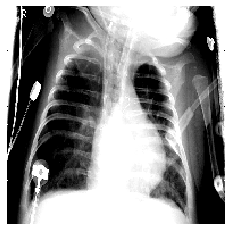

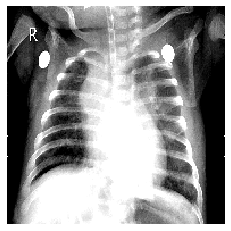

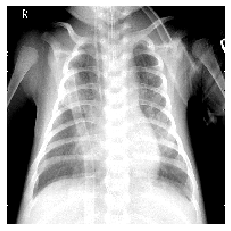

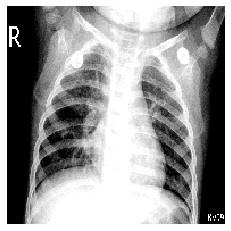

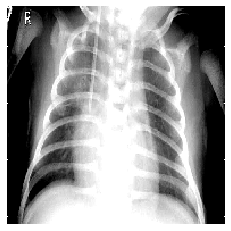

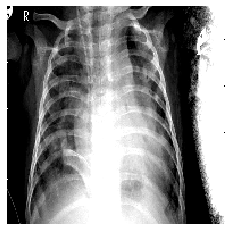

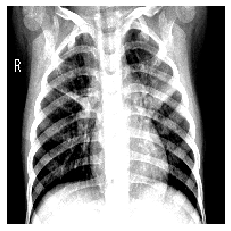

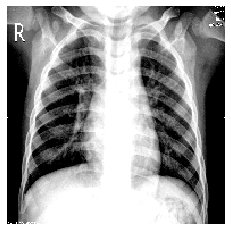

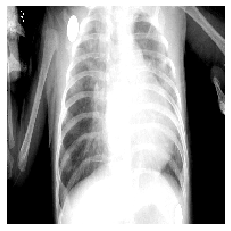

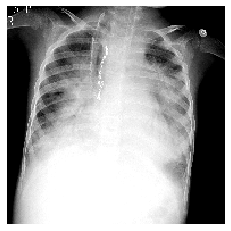

In [100]:
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

In [105]:
"""Data conversion for One vs One classification
M = image_data.shape[0]
print(image_data.shape[0])
image_data = image_data.reshape(M,-1)
print(image_data.shape[0])
"""
print(images_copy[104])
print(images_copy.shape)
print(labels.shape)

[0. 0. 0. ... 0. 0. 0.]
(5198, 36864)
(5198,)


In [101]:
## Randomly shuffle data

import random 
combined = list(zip(images_copy, labels))
random.shuffle(combined)

images_copy[:], labels[:] = zip(*combined)


In [106]:

from sklearn import svm
# Train SVM and get train accuracy 

svm_classifier = svm.SVC(kernel='linear', C=1.0) #learning rate =1 
svm_classifier.fit(images_copy, labels)
ypred_sklearn = svm_classifier.predict(images_copy)
svm_classifier.score(images_copy,labels)

0.8614851866102347

In [107]:
"""
Next steps:
Do validation and test set - Set up the test data and validation data. 
Repeat the same thing for virus vs bacteria. 


This is the validation step
"""
p = Path("val/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}
#labels the folders in the directory
image_data2 = []
labels2 = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"): #For each image in the list of images: 
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img) #Converts image into numerical values
        image_data2.append(img_array) #Append the numerical representation of the image to an array
        labels2.append(labels_dict[label])#The label list appends the label of that particular instance


print(len(labels2))
print(len(image_data2))

73
73


(73, 192, 192, 3) (73,)
[[[[0.28627452 0.28627452 0.28627452]
   [0.2784314  0.2784314  0.2784314 ]
   [0.28235295 0.28235295 0.28235295]
   ...
   [0.24313726 0.24313726 0.24313726]
   [0.20392157 0.20392157 0.20392157]
   [0.24313726 0.24313726 0.24313726]]

  [[0.29803923 0.29803923 0.29803923]
   [0.29803923 0.29803923 0.29803923]
   [0.2901961  0.2901961  0.2901961 ]
   ...
   [0.22745098 0.22745098 0.22745098]
   [0.3019608  0.3019608  0.3019608 ]
   [0.2784314  0.2784314  0.2784314 ]]

  [[0.32941177 0.32941177 0.32941177]
   [0.28627452 0.28627452 0.28627452]
   [0.28627452 0.28627452 0.28627452]
   ...
   [0.20784314 0.20784314 0.20784314]
   [0.2627451  0.2627451  0.2627451 ]
   [0.28235295 0.28235295 0.28235295]]

  ...

  [[0.21176471 0.21176471 0.21176471]
   [0.23137255 0.23137255 0.23137255]
   [0.23921569 0.23921569 0.23921569]
   ...
   [0.54901963 0.54901963 0.54901963]
   [0.5411765  0.5411765  0.5411765 ]
   [0.7411765  0.7411765  0.7411765 ]]

  [[0.21960784 0.2196

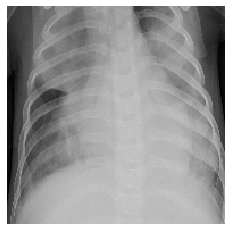

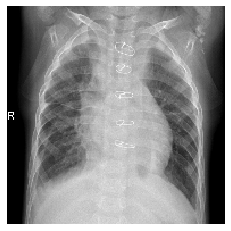

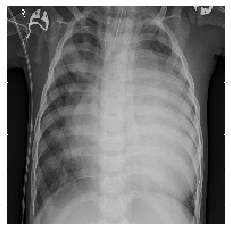

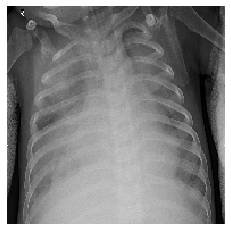

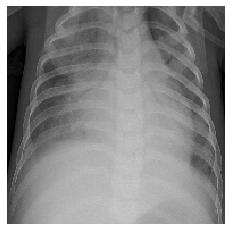

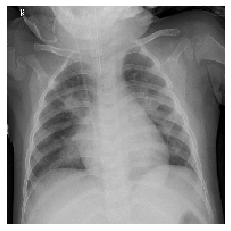

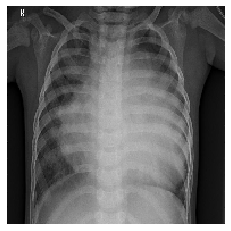

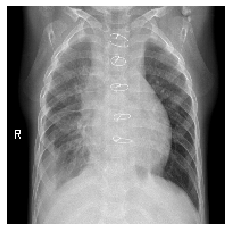

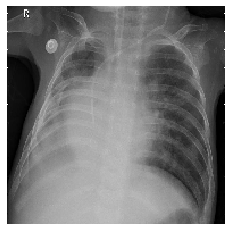

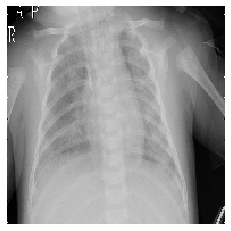

In [108]:

#convert data to numpy array 
image_data2 = np.array(image_data2, dtype='float32')/255.0 #Why do we need this? 
labels2 = np.array(labels2)
#192*192 is the size
print(image_data2.shape, labels2.shape) #This means it is a four dimensional?
print(image_data2) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data2[i])

[0. 0. 0.]
0.0
[0. 0. 0.]
0.0
[0. 0. 0.]
0.0
[0.11948246 0.11948246 0.11948246]
0.11948246
[0.18486163 0.18486163 0.18486163]
0.18486163
36864
73
0.5296924
0.52741885
0.51938176
0.51732963
0.52027345
Mean and standard deviation
0.54133373
0.4043547
-6.6227384e-09
0.99999994
0.52722955
0.4232096
Mean and standard deviation
0.523936
0.41290572
-1.3245477e-07
0.9999999
0.51427555
0.43105686
Mean and standard deviation
0.50642085
0.42506495
3.3113693e-08
0.99999994
0.5028376
0.438339
Mean and standard deviation
0.5071686
0.40848053
-5.2981907e-08
1.0
0.50364757
0.42412907
Mean and standard deviation
0.5155608
0.4167125
-1.1258655e-07
1.0
0.5092211
0.43284106
Mean and standard deviation
0.5166857
0.4154239
-7.947286e-08
1.0
0.51012313
0.43291736
Mean and standard deviation
0.48451614
0.41924542
3.973643e-08
0.99999994
0.48516002
0.43409055
Mean and standard deviation
0.5318223
0.40672794
-9.934107e-08
1.0
0.5214417
0.4246202
Mean and standard deviation
0.50534534
0.42000344
-5.9604645e-08
0

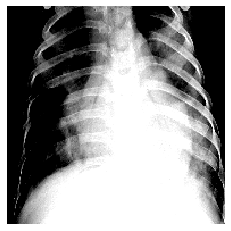

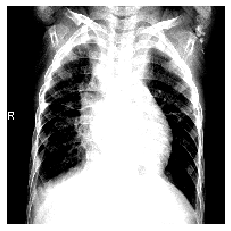

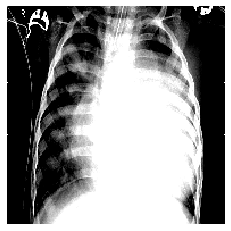

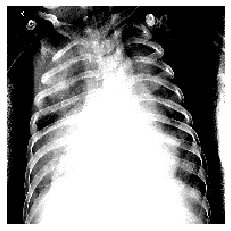

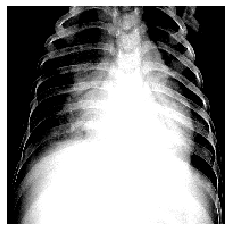

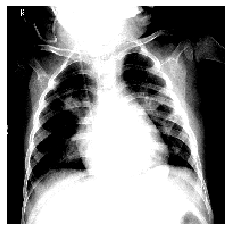

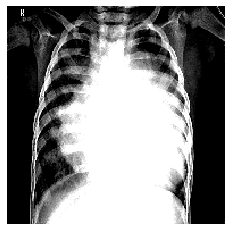

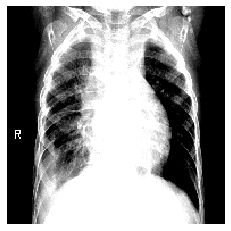

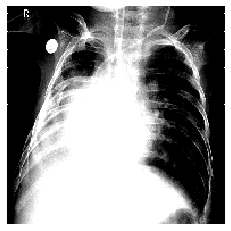

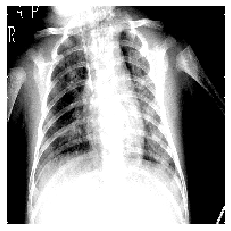

In [113]:
images_copy2 = []
for that_image in image_data2: #taking data for each image
    image_data_copy = [] #The pixel data for that image
    for row in that_image: 
        for column in row: #Each pixel
            image_data_copy.append(column) #Column is a triplet of identical RGB - should be 36864
    image_data_copy = np.array(image_data_copy, dtype='float32')
    image_data_copy = image_data_copy[:, 0]
    images_copy2.append(image_data_copy)

images_copy2 = np.array(images_copy2, dtype='float32')


    
from numpy import clip
j = 0
for k in range(45,50):
    print(images_copy2[k].mean())
for pix in range (len(images_copy2)):
    pixelline = images_copy2[pix]
    mean, std = pixelline.mean(), pixelline.std()
   
    pixelline = (pixelline - mean)/std
   
    
    pixelline = clip(pixelline, -1.0, 1.0)
    pixelline = (pixelline + 1.0)/2.0
   
    #Convert each value of the triplet to the normalized value in the pixelline - this is an
    #experiment
    images_copy2[pix] = pixelline
    i = 0
    for row in range(len(image_data2[j])):#192
        for col in range(len(image_data2[j][row])):#192
            for rgb in range(len(image_data2[j][row][col])):#3
                image_data2[j][row][col][rgb] = pixelline[i]
            i = i+1 #should update 36000 times for the whole picture
    j = j+1
for l in range(45,50):
    print(images_copy2[l].mean())
    
def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data2[i])

In [114]:
## Randomly shuffle data

import random 
combined = list(zip(images_copy2, labels2))
random.shuffle(combined)

images_copy2[:], labels2[:] = zip(*combined)

print(images_copy2.shape)
print(labels2.shape)

#Get val accuracy 


(73, 36864)
(73,)


In [115]:
ypredval_sklearn = svm_classifier.predict(images_copy2)
svm_classifier.score(images_copy2,labels2)

0.7945205479452054

643
643


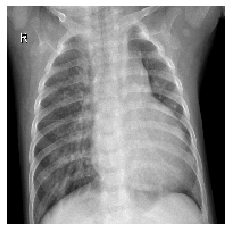

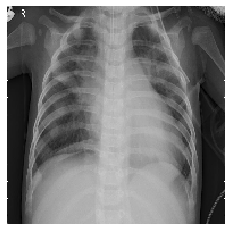

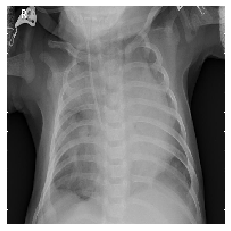

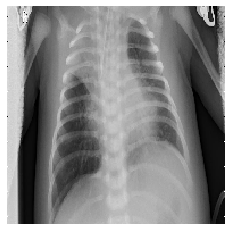

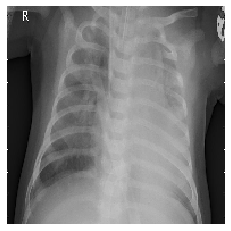

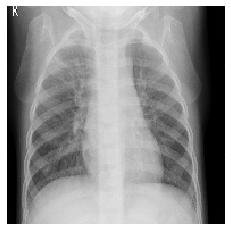

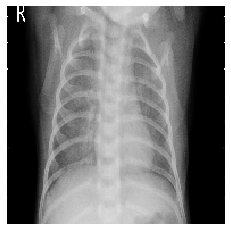

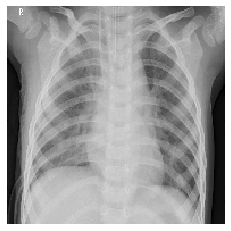

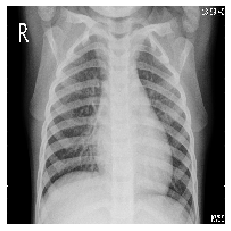

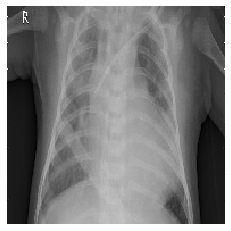

In [135]:
"""
Next steps:
Do validation and test set - Set up the test data and validation data. 
Repeat the same thing for virus vs bacteria. 


This is the test step
"""

import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("test/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}
#labels the folders in the directory
image_data3 = []
labels3 = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"): #For each image in the list of images: 
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img) #Converts image into numerical values
        image_data3.append(img_array) #Append the numerical representation of the image to an array
        labels3.append(labels_dict[label])#The label list appends the label of that particular instance


print(len(labels3))



#convert data to numpy array 
image_data3 = np.array(image_data3, dtype='float32')/255.0 #Why do we need this? 
labels3 = np.array(labels3)
#192*192 is the size


def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data3[i])





In [136]:
images_copy3 = []

for that_image in image_data3: #taking data for each image, converts it to single row
    image_data_copy = [] #The pixel data for that image
    for row in that_image: 
        for column in row: #Each pixel
            image_data_copy.append(column) #Column is a triplet of identical RGB - should be 36864
    image_data_copy = np.array(image_data_copy, dtype='float32')
    image_data_copy = image_data_copy[:, 0]
    images_copy3.append(image_data_copy)
print(image_data_copy.shape)

images_copy3 = np.array(images_copy3, dtype='float32')

from numpy import clip
j = 0
for k in range(45,50):
    print(images_copy3[k].mean())
for pix in range (len(images_copy3)):
    pixelline = images_copy3[pix]
    mean, std = pixelline.mean(), pixelline.std()
   
    pixelline = (pixelline - mean)/std
    
    pixelline = clip(pixelline, -1.0, 1.0)
    pixelline = (pixelline + 1.0)/2.0
   
    #Convert each value of the triplet to the normalized value in the pixelline - this is an
    #experiment
    images_copy3[pix] = pixelline
    
    j = j+1
for l in range(45,50):
    print(images_copy3[l].mean())
    
## Visualize the data



0.54850703
0.56818706
0.44228327
0.53490514
0.4842827
Mean and standard deviation
0.49960122
0.24935457
-6.6227386e-08
1.0
0.5466781
0.3616893
Mean and standard deviation
0.42576483
0.21529235
-2.4835268e-07
1.0
0.5105128
0.40155956
Mean and standard deviation
0.41788512
0.2174055
9.602971e-08
1.0
0.5406603
0.39049155
Mean and standard deviation
0.4800774
0.22572213
2.9802322e-08
1.0
0.53192455
0.38330552
Mean and standard deviation
0.44072032
0.20445779
3.973643e-08
0.99999994
0.53901917
0.38891792
Mean and standard deviation
0.52577156
0.2670388
8.6095596e-08
1.0
0.5568862
0.3726394
Mean and standard deviation
0.41154325
0.29492137
-5.2981907e-08
1.0
0.5364776
0.40595013
Mean and standard deviation
0.5779784
0.19942139
-2.682209e-07
1.0
0.5667751
0.35002115
Mean and standard deviation
0.49919116
0.27694097
1.5894572e-07
1.0
0.56032795
0.37214416
Mean and standard deviation
0.42794663
0.2023963
-6.7883065e-08
1.0
0.5348912
0.3915871
Mean and standard deviation
0.4539032
0.23069192
-8.

0.5017764
0.3923001
Mean and standard deviation
0.37071133
0.19877422
-3.3113692e-09
1.0
0.49034536
0.3882351
Mean and standard deviation
0.33970484
0.1372996
-7.947286e-08
1.0
0.477204
0.37611386
Mean and standard deviation
0.47916254
0.21619006
-4.9670536e-08
1.0
0.54157573
0.38670892
Mean and standard deviation
0.5712542
0.23272143
-3.8080746e-08
1.0
0.5546377
0.35878578
Mean and standard deviation
0.4737755
0.22707486
-1.05963814e-07
1.0000001
0.55027115
0.36400735
Mean and standard deviation
0.58767253
0.22034454
1.3245477e-07
1.0
0.54064614
0.3741334
Mean and standard deviation
0.60444105
0.23692992
-5.2981907e-08
1.0
0.5760164
0.31950566
Mean and standard deviation
0.4177778
0.17910737
1.9868216e-08
1.0
0.5079943
0.38555184
Mean and standard deviation
0.4005602
0.20688742
1.9868216e-08
0.99999994
0.49274656
0.38872755
Mean and standard deviation
0.42881373
0.19312698
-7.285012e-08
0.99999994
0.50795525
0.3890148
Mean and standard deviation
0.46514586
0.2371101
1.05963814e-07
1.0

-1.3245477e-08
1.0
0.5580108
0.36156148
Mean and standard deviation
0.4301845
0.21350354
6.6227384e-09
1.0
0.52349687
0.40100598
Mean and standard deviation
0.47591987
0.19890776
1.9868216e-08
1.0
0.54752773
0.3824918
Mean and standard deviation
0.581879
0.19140552
7.616149e-08
1.0
0.5540736
0.37150005
Mean and standard deviation
0.50526714
0.27504164
1.05963814e-07
0.9999999
0.55447936
0.38104773
Mean and standard deviation
0.5309934
0.19697686
1.3245477e-07
1.0
0.55959815
0.365247
Mean and standard deviation
0.5016909
0.22017853
-4.9670536e-08
1.0
0.55875355
0.3651498
Mean and standard deviation
0.4307623
0.18713763
-1.5894572e-07
1.0
0.5211708
0.3911766
Mean and standard deviation
0.43635994
0.27680612
-9.934108e-09
0.99999994
0.54428315
0.39663348
Mean and standard deviation
0.4277367
0.16936061
1.7053551e-07
0.99999994
0.5246726
0.36976314
Mean and standard deviation
0.59749734
0.27876443
-5.2981907e-08
1.0
0.5716692
0.35389146
Mean and standard deviation
0.37300733
0.24478091
-5.

-1.6556847e-08
1.0
0.53402793
0.3803377
Mean and standard deviation
0.48052645
0.2599227
-9.934107e-08
1.0
0.5592626
0.37622526
Mean and standard deviation
0.46441746
0.25693896
1.6556845e-07
1.0
0.5416854
0.3711812
Mean and standard deviation
0.44310203
0.20348631
1.1920929e-07
1.0
0.50790524
0.40020832
Mean and standard deviation
0.5203656
0.23025368
0.0
1.0
0.5361789
0.35517547
Mean and standard deviation
0.5593562
0.19510986
-1.5232298e-07
1.0
0.51592785
0.3686496
Mean and standard deviation
0.37619188
0.26776975
-9.934108e-09
1.0
0.5043377
0.39940587
Mean and standard deviation
0.42287827
0.25120524
3.973643e-08
1.0
0.51738286
0.37888584
Mean and standard deviation
0.43138874
0.22908376
-2.3179584e-08
1.0
0.5243055
0.38136008
Mean and standard deviation
0.31387848
0.2001419
-1.9868216e-08
1.0
0.5245828
0.38547942
Mean and standard deviation
0.5010183
0.23131005
-4.4703484e-08
1.0
0.536882
0.36512983
Mean and standard deviation
0.4994127
0.23064402
3.3113693e-08
1.0
0.5449484
0.371

0.54296136
0.38078934
Mean and standard deviation
0.40652895
0.22568488
-5.9604645e-08
0.99999994
0.53582793
0.37287283
Mean and standard deviation
0.5350434
0.24401417
-9.271834e-08
1.0
0.55345273
0.356772
Mean and standard deviation
0.50560844
0.2166693
-6.6227384e-09
1.0
0.52693516
0.36750582
Mean and standard deviation
0.5944462
0.17301714
-1.4570024e-07
0.99999994
0.5209044
0.38635597
Mean and standard deviation
0.45513642
0.23791592
6.6227386e-08
1.0
0.5272379
0.36713213
Mean and standard deviation
0.47949177
0.22868684
1.3245477e-08
1.0
0.5239516
0.36727163
Mean and standard deviation
0.4158036
0.24406269
3.642506e-08
1.0
0.52393943
0.38738775
Mean and standard deviation
0.5253732
0.22647826
3.4438239e-07
1.0
0.5404385
0.3610771
Mean and standard deviation
0.5871785
0.2755443
1.3245477e-08
1.0
0.54430926
0.38269657
Mean and standard deviation
0.45503962
0.25320533
9.934108e-09
1.0
0.5349862
0.37888324
Mean and standard deviation
0.4822785
0.25160065
-3.3113693e-08
1.0
0.53808755

In [137]:
## Randomly shuffle data

import random 
combined = list(zip(images_copy3, labels3))
random.shuffle(combined)

images_copy3[:], labels3[:] = zip(*combined)

print(len(images_copy3))
print(len(labels3))

643
643


In [138]:
ypredval_sklearn = svm_classifier.predict(images_copy3)
print(svm_classifier.score(images_copy3,labels3))

0.6531881804043546
